In [994]:
import pandas as pd

# Carga el archivo desde tu Google Drive o súbelo directamente en Colab
df = pd.read_csv('Data 80 aniversario study QS(Base de respuestas 80 aniversar) (1).csv', encoding='latin1')

df.head()




/var/folders/zr/pyyqt9pn36ngd9ybwtj439x00000gn/T/ipykernel_11142/1748400498.py:4: DtypeWarning: Columns (29,30,35,44,45,50,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data 80 aniversario study QS(Base de respuestas 80 aniversar) (1).csv', encoding='latin1')


,External Data Reference,Gender,Campus,programa nombre,nivel_descripción,escuela,años de graduación,Decada,lustro,AGE,...,"Please rate each of the following statements using the appropiare scale: IOverall, to what extent do you feel the things you do in your life are worthwhile? \n Where 1 is = Not at All Worthwhile, and 10 = Completely Worthwhile","Please rate each of the following statements using the appropiare scale: In general, how would you rate your physical health?\n Where 1 = Very poor physical health, 10 = excellent physical health","Please rate each of the following statements using the appropiare scale: How would you rate your overall mental health?\n Where 1= very poor mental health, 10= excellent mental health","Please rate each of the following statements using the appropiare scale: I always act to promote good in all circumstances, even in difficult and challenging situations \n Where 1= Not true about me, 10 = Completely true about me","Please rate each of the following statements using the appropiare scale: I am always able to give up some happiness now for greater happiness later.\n Where 1= not true of me, 10 = totally true of me","Please rate each of the following statements using the appropiare scale: I am content with my friendships and relationships.\n Where 1 = strongly disagree, 10= Totally agree","Please rate each of the following statements using the appropiare scale: My relationships are as satisfying as I would want them to be \n Where 1= strongly disagree, 10= Totally agree","Please rate each of the following statements using the appropiare scale: How often do you worry about being able to meet normal monthly living expenses?\n Where 1= worry all of the time, 10= Do not ever worry","Please rate each of the following statements using the appropiare scale: How often do you worry about safety, food, or housing?\n Where 1= worry all the time, 10= Do not ever worry","Please rate each of the following statements using the appropiare scale: I understand my purpose in life \n Where 1 = strongly disagree, 10 = Strongly agree"
0,IQA05MTY1102,F,Monterrey,Ingeniero Químico Administrador,Profesional,Ingeniería y Ciencias,2019,01´s,01´s 2,27,...,10,10,8,10,10,10,10,10,10,10
1,IMA05MTY5696,F,Monterrey,Ingeniero Mecánico Administrador,Profesional,Ingeniería y Ciencias,2010,01´s,01´s 1,36,...,9,8,8,9,9,10,9,9,10,10
2,LAF05MTY2822,M,Monterrey,Licenciado en Administración Financiera,Profesional,Negocios,2010,01´s,01´s 1,35,...,9,10,8,8,8,8,9,4,2,9
3,IME05MTY19111,M,Monterrey,Ingeniero Mecánico Electricista,Profesional,Ingeniería y Ciencias,2011,01´s,01´s 1,34,...,8,8,6,10,10,8,8,6,5,7
4,IIS05HER11174,F,Sonora Norte,Ingeniero Industrial y de Sistemas,Profesional,Ingeniería y Ciencias,2011,01´s,01´s 1,34,...,10,10,10,10,10,10,10,5,9,10


In [995]:
# Renombramos la columna objetivo para facilitar el trabajo
df = df.rename(columns={
    'Since graduating from Tecnológico de Monterrey, have you founded a nonprofit organization, as part of the founding group or main founder?': 'founded_nonprofit'
})


In [996]:
# Ver las respuestas únicas
print(df['founded_nonprofit'].unique())

# Codificación binaria
df['founded_nonprofit_bin'] = df['founded_nonprofit'].map({
    'Yes': 1,
    'No': 0
})

label_col = df['founded_nonprofit_bin']



['No' 'Yes']


In [997]:
# Drop columns with more than 70% missing values
threshold = 0.7
df_reduced = df.loc[:, df.isnull().mean() < threshold]
df = df_reduced.copy()

In [998]:
low_variance_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
df = df.drop(columns=low_variance_cols)
df = df.drop(columns=['External Data Reference'])


In [999]:
# Separate numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

AGE: 71 unique values


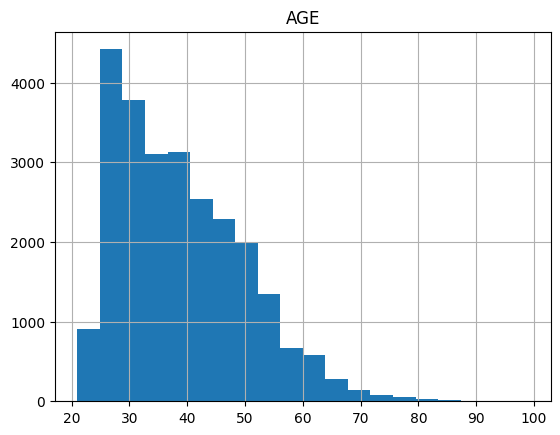

What percentage of support did you receive from the scholarship?: 97 unique values


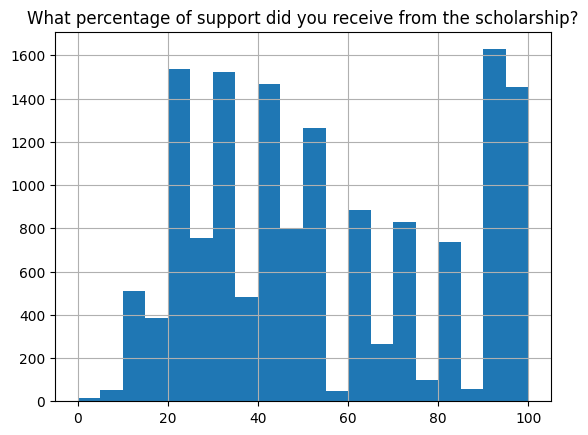

How many hours do you usually work per week?: 98 unique values


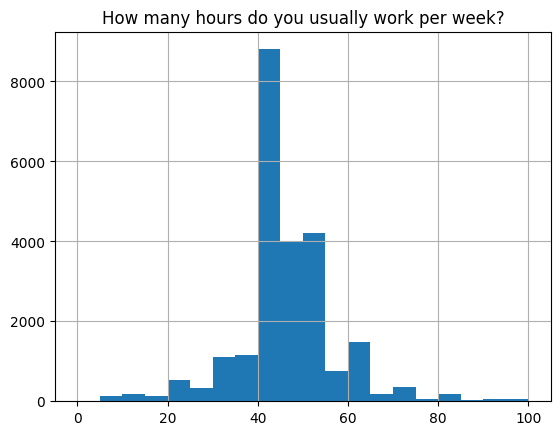

Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month: 85 unique values


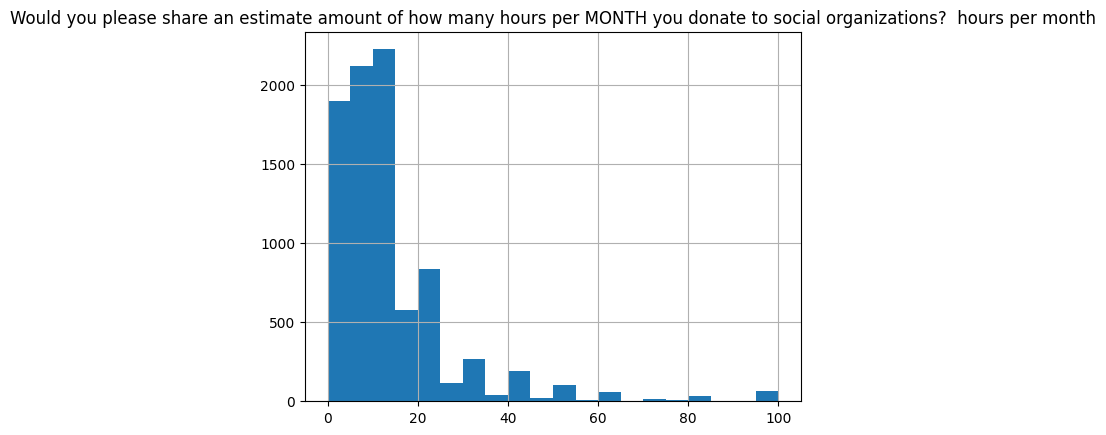

Please rate each of the following statements using the appropiare scale:  In general, how happy or unhappy do you usually feel?
 extremely unhappy:Where 1=Extremely unhappy, 10=Extremely happy: 10 unique values
Please rate each of the following statements using the appropiare scale:  Overall, how satisfied are you with life as a whole these days??
 Where 1 = Not satisfied at all, 10 = Completely Satisfied: 10 unique values
Please rate each of the following statements using the appropiare scale:  IOverall, to what extent do you feel the things you do in your life are worthwhile? 
 Where 1 is = Not at All Worthwhile, and 10 = Completely Worthwhile: 10 unique values
Please rate each of the following statements using the appropiare scale:  In general, how would you rate your physical health?
 Where 1 = Very poor physical health, 10 = excellent physical health: 10 unique values
Please rate each of the following statements using the appropiare scale:  How would you rate your overall mental h

In [1000]:
import matplotlib.pyplot as plt

# Check uniqueness
for col in num_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals > 10 and unique_vals < 100:
        df[col].hist(bins=20)
        plt.title(col)
        plt.show()

In [1001]:
df['AGE_bucket'] = pd.cut(df['AGE'], bins=[17, 29, 39, 49, 59, 120], labels=[0, 1, 2, 3, 4])

def scholarship_bucket(x):
    if pd.isna(x):
        return 'Missing'
    elif x == 0:
        return 0
    elif x <= 25:
        return 1
    elif x <= 50:
        return 2
    elif x <= 75:
        return 3
    else:
        return 4

df['scholarship_bucket'] = df['What percentage of support did you receive from the scholarship?'].apply(scholarship_bucket)

df['work_hours_bucket'] = pd.cut(df['How many hours do you usually work per week?'],
                                 bins=[0, 20, 39, 49, 60, 100],
                                 labels=[0, 1, 2, 3, 4])

df['donation_hours_bucket'] = pd.cut(df['Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month'],
                                     bins=[-1, 0, 4, 10, 20, 100],
                                     labels=[0, 1, 2, 3, 4])


In [1002]:
# Define Likert bucketing function
def bucket_likert(val):
    if pd.isna(val):
        return 0
    elif val <= 4:
        return 1
    elif val <= 7:
        return 2
    else:
        return 3

# List of Likert-scale columns
likert_cols = [
    col for col in df.columns
    if col.startswith('Please rate each') or col.startswith('Please rate each of the following')
]


# Apply bucketing
for col in likert_cols:
    new_col = col + ' (bucketed)'
    df[new_col] = df[col].apply(bucket_likert)
    print(str(df[new_col]))


0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  In general, how happy or unhappy do you usually feel?\n extremely unhappy:Where 1=Extremely unhappy, 10=Extremely happy (bucketed), Length: 25358, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  Overall, how satisfied are you with life as a whole these days??\n Where 1 = Not satisfied at all, 10 = Completely Satisfied (bucketed), Length: 25358, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  IOverall, to what extent do you feel the things you do in your life are 

In [1003]:
# List of raw numeric columns used for bucketing
raw_numeric_bucket_cols = [
    'AGE',
    'What percentage of support did you receive from the scholarship?',
    'How many hours do you usually work per week?',
    'Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month'
]

# List of original Likert-scale columns
likert_raw_cols = [
    col for col in df.columns
    if (col.startswith('Please rate each') or col.startswith('Please rate each of the following'))
    and not '(bucketed)' in col
]

# Combine and drop from df_model
cols_to_drop = raw_numeric_bucket_cols + likert_raw_cols

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])



In [1004]:
for col in df.columns:
  if '(bucketed)' in col and 'rate' in col:
    print(df[col])

0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  In general, how happy or unhappy do you usually feel?\n extremely unhappy:Where 1=Extremely unhappy, 10=Extremely happy (bucketed), Length: 25358, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  Overall, how satisfied are you with life as a whole these days??\n Where 1 = Not satisfied at all, 10 = Completely Satisfied (bucketed), Length: 25358, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
25353    3
25354    3
25355    3
25356    3
25357    3
Name: Please rate each of the following statements using the appropiare scale:  IOverall, to what extent do you feel the things you do in your life are 

In [1005]:
# Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for target in ['founded_nonprofit', 'founded_nonprofit_bin']:
    if target in cat_cols: cat_cols.remove(target)
    if target in num_cols: num_cols.remove(target)

# Encode categorical features for df_model_encoded
df_encoded = pd.get_dummies(df[cat_cols], drop_first=False)
df_model_encoded = pd.concat([df[num_cols], df_encoded], axis=1)

# Add back target
df_model_encoded['founded_nonprofit_bin'] = label_col

# ✅ Optional: check which High-level features are present
print("\n🔍 Bucketed High features present:")
for col in df_encoded.columns:
    if '(bucketed)_High' in col:
        print(col)



🔍 Bucketed High features present:


In [1006]:
print(df_encoded.columns)

Index(['Gender_F', 'Gender_M', 'Campus_Aguascalientes',
       'Campus_Central de Veracruz', 'Campus_Chiapas', 'Campus_Chihuahua',
       'Campus_Ciudad Juárez', 'Campus_Ciudad Obregón',
       'Campus_Ciudad de México', 'Campus_Colima',
       ...
       'work_hours_bucket_0', 'work_hours_bucket_1', 'work_hours_bucket_2',
       'work_hours_bucket_3', 'work_hours_bucket_4', 'donation_hours_bucket_0',
       'donation_hours_bucket_1', 'donation_hours_bucket_2',
       'donation_hours_bucket_3', 'donation_hours_bucket_4'],
      dtype='object', length=725)


In [1007]:

my_correlations = df_model_encoded.corr()['founded_nonprofit_bin'].sort_values(ascending=False)
correlation_dict = my_correlations.to_dict()

In [1008]:
for feature, corr_value in sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {corr_value:.4f}")

founded_nonprofit_bin: 1.0000
During the last year, have you done any volunteer work (unpaid) for social organizations?_Yes: 0.1903
donation_hours_bucket_4: 0.1864
Have you participated as an Advisor in any Advisory Boards of a company?_Yes: 0.1667
How much money per year do you donate to social organizations? If you donate in another currency, please select an approximate amount in Mexican pesos.._More than 10,000 Mexican Pesos: 0.1622
Since graduating from Tecnológico de Monterrey, have you founded a company, either as part of the group of partners or as owner? By partner we mean those who contributed money and/or work to start the company_Yes: 0.1573
Please select the option that best describes your current situation  Selected Choice_Partner or owner of a company: 0.1333
Do you regularly donate money to social organizations?_Yes: 0.1327
AGE_bucket_4: 0.1246
donation_hours_bucket_3: 0.1202
Decada_80´s: 0.1092
Por favor conteste las siguientes preguntas de los puestos de trabajo que h

In [1009]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(df_model_encoded.drop(columns=["founded_nonprofit_bin"]))
selected_columns = df_model_encoded.drop(columns=["founded_nonprofit_bin"]).columns[selector.get_support()]

In [1010]:
from sklearn.feature_selection import SelectKBest, chi2

X = df_model_encoded[selected_columns]
y = df_model_encoded['founded_nonprofit_bin']  # your yes/no column

selector = SelectKBest(chi2, k=10)  # or 'all' to rank everything
X_new = selector.fit_transform(X, y)
top_features = X.columns[selector.get_support()]
print(top_features)



Index(['Decada_80´s',
       'Please select the option that best describes your current situation  Selected Choice_Partner or owner of a company',
       'Since graduating from Tecnológico de Monterrey, have you founded a company, either as part of the group of partners or as owner? By partner we mean those who contributed money and/or work to start the company_Yes',
       'Have you participated as an Advisor in any Advisory Boards of a company?_Yes',
       'How much money per year do you donate to social organizations? If you donate in another currency, please select an approximate amount in Mexican pesos.._More than 10,000 Mexican Pesos',
       'During the last year, have you done any volunteer work (unpaid) for social organizations?_No',
       'During the last year, have you done any volunteer work (unpaid) for social organizations?_Yes',
       'AGE_bucket_4', 'donation_hours_bucket_3', 'donation_hours_bucket_4'],
      dtype='object')


In [1011]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature -> importance
feature_importance_dict = dict(zip(X.columns, importances))

# Sort by importance descending
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: -x[1])

# Pretty print the results
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


During the last year, have you done any volunteer work (unpaid) for social organizations?_Yes: 0.0416
During the last year, have you done any volunteer work (unpaid) for social organizations?_No: 0.0299
Since graduating from Tecnológico de Monterrey, have you founded a company, either as part of the group of partners or as owner? By partner we mean those who contributed money and/or work to start the company_No: 0.0222
Since graduating from Tecnológico de Monterrey, have you founded a company, either as part of the group of partners or as owner? By partner we mean those who contributed money and/or work to start the company_Yes: 0.0220
Have you participated as an Advisor in any Advisory Boards of a company?_Yes: 0.0153
Do you regularly donate money to social organizations?_No: 0.0139
Please select the option that best describes your current situation  Selected Choice_Paid employee: 0.0135
Have you participated as an Advisor in any Advisory Boards of a company?_No: 0.0132
donation_hours

In [1012]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

# Split your dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Try a range of class weights for class 1
weights_to_try = [1, 2, 5, 10, 20, 30, 40, 50, 55, 60, 65, 70, 75, 80, 90, 100, 150]

results = []
best_f1_class1 = 0
best_f1_macro = 0
best_weight_class1 = None
best_weight_macro = None

for w in weights_to_try:
    model = RandomForestClassifier(class_weight={0: 1, 1: w}, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1_class1 = f1_score(y_val, y_pred, pos_label=1)
    f1_macro = f1_score(y_val, y_pred, average='macro')
    results.append((w, f1_class1, f1_macro))

    if f1_class1 > best_f1_class1:
        best_f1_class1 = f1_class1
        best_weight_class1 = w

    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_weight_macro = w

# Show all results
print("\n🔍 Class weight performance:")
for w, f1_class1, f1_macro in results:
    print(f"class_weight 1:{w} → F1 (class 1): {f1_class1:.4f}, Macro F1: {f1_macro:.4f}")

# Report best weights
print(f"\n✅ Best F1-score (class 1): {best_f1_class1:.4f} at class_weight 1:{best_weight_class1}")
print(f"✅ Best Macro F1-score    : {best_f1_macro:.4f} at class_weight 1:{best_weight_macro}")



🔍 Class weight performance:
class_weight 1:1 → F1 (class 1): 0.0485, Macro F1: 0.5062
class_weight 1:2 → F1 (class 1): 0.0486, Macro F1: 0.5063
class_weight 1:5 → F1 (class 1): 0.0591, Macro F1: 0.5117
class_weight 1:10 → F1 (class 1): 0.0488, Macro F1: 0.5064
class_weight 1:20 → F1 (class 1): 0.0593, Macro F1: 0.5118
class_weight 1:30 → F1 (class 1): 0.0543, Macro F1: 0.5094
class_weight 1:40 → F1 (class 1): 0.0435, Macro F1: 0.5037
class_weight 1:50 → F1 (class 1): 0.0749, Macro F1: 0.5197
class_weight 1:55 → F1 (class 1): 0.0596, Macro F1: 0.5121
class_weight 1:60 → F1 (class 1): 0.0542, Macro F1: 0.5092
class_weight 1:65 → F1 (class 1): 0.0489, Macro F1: 0.5066
class_weight 1:70 → F1 (class 1): 0.0591, Macro F1: 0.5117
class_weight 1:75 → F1 (class 1): 0.0493, Macro F1: 0.5069
class_weight 1:80 → F1 (class 1): 0.0489, Macro F1: 0.5066
class_weight 1:90 → F1 (class 1): 0.0488, Macro F1: 0.5064
class_weight 1:100 → F1 (class 1): 0.0596, Macro F1: 0.5121
class_weight 1:150 → F1 (clas

In [1013]:
import pandas as pd
model_class1 = RandomForestClassifier(class_weight={0: 1, 1: best_weight_class1}, random_state=42)
model_macro = RandomForestClassifier(class_weight={0: 1, 1: best_weight_macro}, random_state=42)

model_class1.fit(X_train, y_train)
model_macro.fit(X_train, y_train)

feature_importance_model_class1_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_class1.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance_model_macro_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_macro.feature_importances_
}).sort_values(by='importance', ascending=False)


# View top 20
print(feature_importance_model_class1_df.head(20))


top_n = 20
top_features_class1 = feature_importance_model_class1_df['feature'].head(top_n).tolist()
X_top_class1 = X_train[top_features_class1]
X_val_top_class1 = X_val[top_features_class1]


top_features_macro = feature_importance_model_macro_df['feature'].head(top_n).tolist()
X_top_macro = X_train[top_features_macro]
X_val_top_macro = X_val[top_features_macro]




                                               feature  importance
233  During the last year, have you done any volunt...    0.031465
232  During the last year, have you done any volunt...    0.026323
223  Since graduating from Tecnológico de Monterrey...    0.019916
222  Since graduating from Tecnológico de Monterrey...    0.017310
11   Please rate each of the following statements u...    0.012503
9    Please rate each of the following statements u...    0.012210
10   Please rate each of the following statements u...    0.011559
234                                       AGE_bucket_0    0.010143
226  Do you regularly donate money to social organi...    0.010104
224  Have you participated as an Advisor in any Adv...    0.009342
225  Have you participated as an Advisor in any Adv...    0.009210
227  Do you regularly donate money to social organi...    0.009003
205  Please select the option that best describes y...    0.008834
177  Which of the following best describes the occu...    0.00

### Matrix n = 10
[[4258  461]
 [ 218  135]]
or
[[4438  281]
 [ 254   99]]
### Matrix n = 20
[[4485  234]
 [ 282   71]]

[[4443  276]
 [ 281   72]]
### Matrix n = 30

[[4216  503]
 [ 216  137]]
or
[[4449  270]
 [ 279   74]]

In [1014]:
for i in X_train.columns:
    print(i)

Please rate each of the following statements using the appropiare scale:  In general, how happy or unhappy do you usually feel?
 extremely unhappy:Where 1=Extremely unhappy, 10=Extremely happy (bucketed)
Please rate each of the following statements using the appropiare scale:  Overall, how satisfied are you with life as a whole these days??
 Where 1 = Not satisfied at all, 10 = Completely Satisfied (bucketed)
Please rate each of the following statements using the appropiare scale:  IOverall, to what extent do you feel the things you do in your life are worthwhile? 
 Where 1 is = Not at All Worthwhile, and 10 = Completely Worthwhile (bucketed)
Please rate each of the following statements using the appropiare scale:  In general, how would you rate your physical health?
 Where 1 = Very poor physical health, 10 = excellent physical health (bucketed)
Please rate each of the following statements using the appropiare scale:  How would you rate your overall mental health?
 Where 1= very poor m

In [1015]:
# Assume df is your encoded DataFrame
# We'll manually define logical feature groups

demographic_features = [
    'Gender_F', 'Gender_M',
    'AGE_bucket_0', 'AGE_bucket_1', 'AGE_bucket_2', 'AGE_bucket_3', 'AGE_bucket_4',
    'In which state do you live?_Nuevo León',
    'living state  before studies_Nuevo León',
    'living country_Canada',
    'living country_Colombia',
    'living country_Germany',
    'living country_Mexico',
    'living country_México',
    'living country_Spain',
    'living country_United States of America',
    'In which state do you live?_Aguascalientes',
    'In which state do you live?_Chihuahua',
    'In which state do you live?_Ciudad de México',
    'In which state do you live?_Coahuila',
    'In which state do you live?_Estado de México',
    'In which state do you live?_Guanajuato',
    'In which state do you live?_Hidalgo',
    'In which state do you live?_Jalisco',
    'In which state do you live?_Nuevo León',
    'In which state do you live?_Puebla',
    'In which state do you live?_Querétaro',
    'In which state do you live?_San Luis Potosí',
    'In which state do you live?_Sinaloa',
    'In which state do you live?_Sonora',
    'In which state do you live?_Tamaulipas',
    'In which state do you live?_Veracruz',
    'living country  before studies_Colombia',
    'living country  before studies_México',
    'living state  before studies_Aguascalientes',
    'living state  before studies_Chiapas',
    'living state  before studies_Chihuahua',
    'living state  before studies_Ciudad de México',
    'living state  before studies_Coahuila',
    'living state  before studies_Estado de México',
    'living state  before studies_Guanajuato',
    'living state  before studies_Hidalgo',
    'living state  before studies_Jalisco',
    'living state  before studies_Michoacán',
    'living state  before studies_Morelos',
    'living state  before studies_Nuevo León',
    'living state  before studies_Puebla',
    'living state  before studies_Querétaro',
    'living state  before studies_San Luis Potosí',
    'living state  before studies_Sinaloa',
    'living state  before studies_Sonora',
    'living state  before studies_Tamaulipas',
    'living state  before studies_Veracruz'
]

academic_features = [
    'Decada_00´s',
    'Decada_01´s',
    'Decada_02´s',
    'Decada_70´s',
    'Decada_80´s',
    'Decada_90´s',
    'lustro_00´s  1',
    'lustro_00´s  2',
    'lustro_01´s  1',
    'lustro_01´s  2',
    'lustro_02´s  1',
    'lustro_80´s  1',
    'lustro_80´s  2',
    'lustro_90´s  1',
    'lustro_90´s  2',
    'lustro_Sin dato',
    'programa nombre_Ingeniero en Sistemas Computacionales',
    'programa nombre_Licenciado en Derecho',
    'Have you completed postgraduate studies?_Yes',
    "Por favor, háganos saber lo que estudió  CONTESTE TODAS LAS COLUMNAS HACIA LA DERECHA\xa0 \xa0  Study level  Program 1_Master's Degree",
    'programa nombre_Arquitecto',
    'programa nombre_Contador Público',
    'programa nombre_Contador Público Financiero',
    'programa nombre_Ingeniero Civil',
    'programa nombre_Ingeniero Industrial y de Sistemas',
    'programa nombre_Ingeniero Mecánico Administrador',
    'programa nombre_Ingeniero Mecánico Electricista',
    'programa nombre_Ingeniero Químico Administrador',
    'programa nombre_Ingeniero en Biotecnología',
    'programa nombre_Ingeniero en Electrónica y Comunicaciones',
    'programa nombre_Ingeniero en Mecatrónica',
    'programa nombre_Ingeniero en Sistemas Computacionales',
    'programa nombre_Ingeniero en Sistemas Electrónicos',
    'programa nombre_Licenciado en Administración Financiera',
    'programa nombre_Licenciado en Administración y Estrategia de Negocios',
    'programa nombre_Licenciado en Animación y Arte Digital',
    'programa nombre_Licenciado en Ciencias de la Comunicación',
    'programa nombre_Licenciado en Comercio Internacional',
    'programa nombre_Licenciado en Comunicación y Medios Digitales',
    'programa nombre_Licenciado en Derecho',
    'programa nombre_Licenciado en Diseño Industrial',
    'programa nombre_Licenciado en Economía',
    'programa nombre_Licenciado en Mercadotecnia',
    'programa nombre_Licenciado en Mercadotecnia y Comunicación',
    'programa nombre_Licenciado en Negocios Internacionales',
    'programa nombre_Licenciado en Relaciones Internacionales',
    'programa nombre_Licenciado en Sistemas de Computación Administrativa',
    'programa nombre_Maestría en Administración',
    'programa nombre_Maestría en Administración de Tecnologías de Información',
    'programa nombre_Maestría en Educación',
    'nivel_descripción_Maestría',
    'nivel_descripción_Profesional',
    'escuela_Arquitectura, Arte y Diseño',
    'escuela_Ciencias Sociales y Gobierno',
    'escuela_Humanidades y Educación',
    'escuela_Ingeniería y Ciencias',
    'escuela_Medicina y Ciencias de la Salud',
    'escuela_Negocios',
    'Campus_Chihuahua',
    'Campus_Ciudad de México',
    'Campus_Cuernavaca',
    'Campus_EGADE Business School',
    'Campus_Estado de México',
    'Campus_Guadalajara',
    'Campus_Laguna',
    'Campus_León',
    'Campus_Monterrey',
    'Campus_Programas en Línea',
    'Campus_Puebla',
    'Campus_Querétaro',
    'Campus_San Luis Potosí',
    'Campus_Santa Fe',
    'Campus_Sonora Norte',
    'Campus_Toluca'
]

family_background_features = [
    'Which is the education level of your parents?  Father_High School',
    'Which is the education level of your parents?  Father_Not applicable',
    'Which is the education level of your parents?  Father_Postgraduate',
    'Which is the education level of your parents?  Father_Primary level',
    'Which is the education level of your parents?  Father_Secondary level',
    'Which is the education level of your parents?  Father_Technical Career',
    'Which is the education level of your parents?  Father_University',
    'Which is the education level of your parents?  Father_Without studies',
    'Which is the education level of your parents?  Mother_High School',
    'Which is the education level of your parents?  Mother_Postgraduate',
    'Which is the education level of your parents?  Mother_Primary level',
    'Which is the education level of your parents?  Mother_Secondary level',
    'Which is the education level of your parents?  Mother_Technical Career',
    'Which is the education level of your parents?  Mother_University',
    'Which is the education level of your parents?  Mother_Without studies',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Employee of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Freelancer',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Manager of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Other, which one?',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Partner or owner of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Public Servant (federal, state or municipal)',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Technician or tradesman (for example, plumber)',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Trader',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Father_Worker of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Employee of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Freelancer',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Housework',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Manager of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Other, which one?',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Partner or owner of a company',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Public Servant (federal, state or municipal)',
    'Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Trader'
]

# Convert feature groups to a dictionary
feature_groups = {
    "demographic": demographic_features,
    "academic": academic_features,
    "family_background": family_background_features
}


# Combine into a single list of manually selected top features
selected_features = (
    demographic_features +
    academic_features +
    family_background_features
)

# Filter your dataset
X_selected = X_train[selected_features]


In [1016]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1. Train the model on selected features
model = RandomForestClassifier(class_weight={0: 1, 1: best_weight_class1}, random_state=42)
model.fit(X_selected, y_train)

# 2. Create importance dataframe
importance_df = pd.DataFrame({
    'feature': X_selected.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 3. Map each feature to its category
def map_group(feature_name):
    for group_name, features in feature_groups.items():
        if feature_name in features:
            return group_name
    return "unknown"

importance_df['group'] = importance_df['feature'].apply(map_group)


In [1020]:
top_n = 20
count = 0
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)


print(f"{'Feature':<70} {'Importance':<12} {'Group'}")
print("-" * 100)

for _, row in importance_df_sorted.iterrows():
    feature = row['feature']
    importance = row['importance']

    # Determine the group
    group_name = None
    for group, features in feature_groups.items():
        if feature in features:
            group_name = group
            break

    # If not found, optionally label it as "unknown"
    if group_name is None:
        group_name = "unknown"

    print(f"{feature:<70} {importance:<12.5f} {group_name}")

    count += 1
    if count == top_n:
        break


Feature                                                                Importance   Group
----------------------------------------------------------------------------------------------------
Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?  Mother_Housework 0.01765      family_background
Which is the education level of your parents?  Father_University       0.01734      family_background
Which is the education level of your parents?  Mother_University       0.01693      family_background
AGE_bucket_0                                                           0.01688      demographic
Have you completed postgraduate studies?_Yes                           0.01684      academic
living country_México                                                  0.01675      demographic
Which of the following best describes the occupation of your father and mother when you began your studies at Tecnologico de Monterrey?

In [912]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_train, X_val, y_train, y_val):
    # Train
    model.fit(X_train, y_train)

    # Predict probabilities
    y_proba = model.predict_proba(X_val)[:, 1]

    # Threshold search
    thresholds = np.linspace(0.1, 0.9, 81)
    best_f1_class1 = 0
    best_f1_macro = 0
    best_thresh_class1 = 0.5
    best_thresh_macro = 0.5

    for t in thresholds:
        y_pred = (y_proba > t).astype(int)
        f1_pos = f1_score(y_val, y_pred, pos_label=1)
        f1_macro = f1_score(y_val, y_pred, average='macro')

        if f1_pos > best_f1_class1:
            best_f1_class1 = f1_pos
            best_thresh_class1 = t

        if f1_macro > best_f1_macro:
            best_f1_macro = f1_macro
            best_thresh_macro = t

    # Final evaluation
    print(f"\n🔍 Results for {name}")
    print(f"\n✅ Best Threshold for Class 1 F1: {best_thresh_class1:.2f} → F1: {best_f1_class1:.4f}")
    y_pred_class1 = (y_proba > best_thresh_class1).astype(int)
    print(classification_report(y_val, y_pred_class1))
    print(confusion_matrix(y_val, y_pred_class1))

    print(f"\n✅ Best Threshold for Macro F1: {best_thresh_macro:.2f} → Macro F1: {best_f1_macro:.4f}")
    y_pred_macro = (y_proba > best_thresh_macro).astype(int)
    print(classification_report(y_val, y_pred_macro))
    print(confusion_matrix(y_val, y_pred_macro))


    # 5. Evaluate both thresholds
    print(f"\n🔍 Results for {name}")

    print(f"\n✅ Best Threshold for Class 1 F1: {best_thresh_class1:.2f} → F1: {best_f1_class1:.4f}")
    y_pred_class1 = (y_proba > best_thresh_class1).astype(int)
    print(classification_report(y_val, y_pred_class1))
    print(confusion_matrix(y_val, y_pred_class1))

    print(f"\n✅ Best Threshold for Macro F1: {best_thresh_macro:.2f} → Macro F1: {best_f1_macro:.4f}")
    y_pred_macro = (y_proba > best_thresh_macro).astype(int)
    print(classification_report(y_val, y_pred_macro))
    print(confusion_matrix(y_val, y_pred_macro))


# Subset feature sets to top features
X_train_class1 = X_train[top_features_class1]
X_val_class1 = X_val[top_features_class1]

X_train_macro = X_train[top_features_macro]
X_val_macro = X_val[top_features_macro]

# Define models
model_class1 = RandomForestClassifier(class_weight={0: 1, 1: best_weight_class1}, random_state=42)
model_macro = RandomForestClassifier(class_weight={0: 1, 1: best_weight_macro}, random_state=42)

# Evaluate
evaluate_model("Top Features for Class 1", model_class1, X_train_class1, X_val_class1, y_train, y_val)
evaluate_model("Top Features for Macro F1", model_macro, X_train_macro, X_val_macro, y_train, y_val)




🔍 Results for Top Features for Class 1

✅ Best Threshold for Class 1 F1: 0.17 → F1: 0.2759
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4719
           1       0.21      0.39      0.28       353

    accuracy                           0.86      5072
   macro avg       0.58      0.64      0.60      5072
weighted avg       0.90      0.86      0.88      5072

[[4216  503]
 [ 216  137]]

✅ Best Threshold for Macro F1: 0.17 → Macro F1: 0.5987
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4719
           1       0.21      0.39      0.28       353

    accuracy                           0.86      5072
   macro avg       0.58      0.64      0.60      5072
weighted avg       0.90      0.86      0.88      5072

[[4216  503]
 [ 216  137]]

🔍 Results for Top Features for Class 1

✅ Best Threshold for Class 1 F1: 0.17 → F1: 0.2759
              precision    recall  f1-score   suppor

In [913]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def evaluate_threshold(model, X_val, y_val, threshold=0.5, title="Evaluation at Threshold"):
    # Get predicted probabilities
    y_proba = model.predict_proba(X_val)[:, 1]

    # Apply threshold
    y_pred = (y_proba > threshold).astype(int)

    # Metrics
    precision = precision_score(y_val, y_pred, pos_label=1)
    recall = recall_score(y_val, y_pred, pos_label=1)
    f1 = f1_score(y_val, y_pred, pos_label=1)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    print(f"\n🔍 {title} = {threshold:.2f}")
    print(f"Precision (Class 1): {precision:.4f}")
    print(f"Recall (Class 1):    {recall:.4f}")
    print(f"F1-score (Class 1):  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    print(cm)

    # Optional: Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix @ Threshold {threshold:.2f}")
    plt.show()

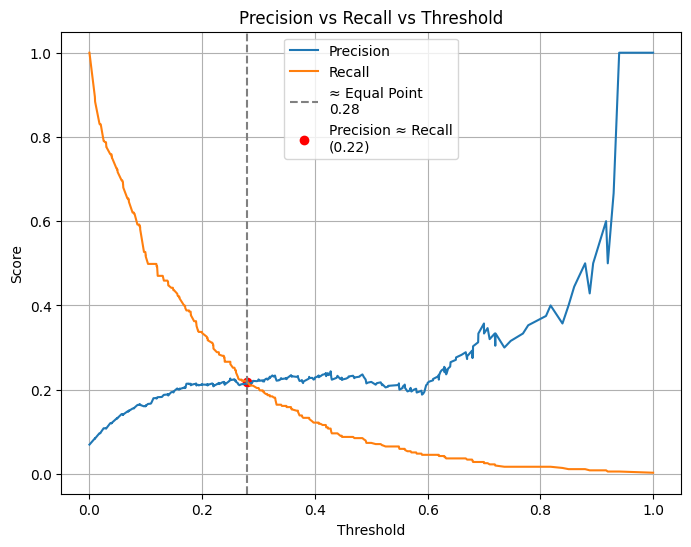

✅ Threshold where Precision ≈ Recall: 0.28
   Precision: 0.2175
   Recall:    0.2181


In [914]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np


# Predict probabilities
y_scores = model_class1.predict_proba(X_val_class1)[:, 1]

# Compute precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

# Find threshold where precision and recall are closest
diffs = np.abs(precisions[:-1] - recalls[:-1])  # Exclude last element to match thresholds
best_index = np.argmin(diffs)
best_threshold = thresholds[best_index]
best_precision = precisions[best_index]
best_recall = recalls[best_index]

# Plot precision and recall
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(best_threshold, color='gray', linestyle='--', label=f'≈ Equal Point\n{best_threshold:.2f}')
plt.scatter(best_threshold, best_precision, color='red', label=f'Precision ≈ Recall\n({best_precision:.2f})')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.title("Precision vs Recall vs Threshold")
plt.show()

# Print result
print(f"✅ Threshold where Precision ≈ Recall: {best_threshold:.2f}")
print(f"   Precision: {best_precision:.4f}")
print(f"   Recall:    {best_recall:.4f}")



🔍 Evaluation at Threshold = 0.28
Precision (Class 1): 0.2151
Recall (Class 1):    0.2096
F1-score (Class 1):  0.2123

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4719
           1       0.22      0.21      0.21       353

    accuracy                           0.89      5072
   macro avg       0.58      0.58      0.58      5072
weighted avg       0.89      0.89      0.89      5072

Confusion Matrix:
[[4449  270]
 [ 279   74]]


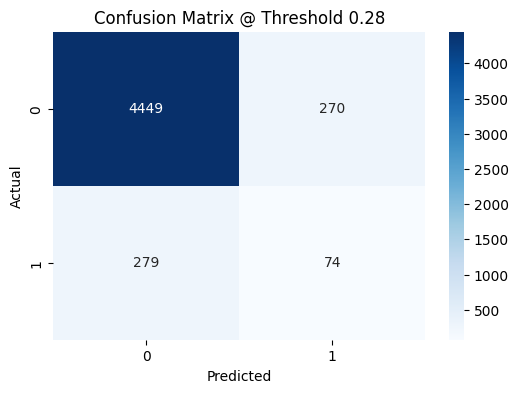

In [916]:
evaluate_threshold(model_class1, X_val_class1, y_val, threshold=0.28)


# CATBOOST

In [745]:
from sklearn.metrics import precision_score, recall_score, make_scorer

def custom_f1_like(y_true, y_pred):
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)

    if precision + recall == 0:
        return 0.0

    # Weighted F1: bias toward recall but penalize precision drops
    beta = 0.5  # beta < 1 favors precision; beta > 1 favors recall
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

custom_scorer = make_scorer(custom_f1_like)


In [746]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 150),
        "loss_function": "Logloss",
        "verbose": 0
    }

    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X, y, cv=cv, scoring=custom_scorer).mean()
    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
study_best_params = study.best_params

print("Best params:", study.best_params)


[I 2025-05-29 19:56:44,833] A new study created in memory with name: no-name-0386a39c-c6c4-4169-9c5f-1216f0fe3eeb
[I 2025-05-29 19:56:47,436] Trial 0 finished with value: 0.11460891932513857 and parameters: {'iterations': 437, 'depth': 4, 'learning_rate': 0.022243694639648814, 'l2_leaf_reg': 0.9599231521781034, 'scale_pos_weight': 52.37318433266166}. Best is trial 0 with value: 0.11460891932513857.
[I 2025-05-29 19:56:49,602] Trial 1 finished with value: 0.32582950719656684 and parameters: {'iterations': 143, 'depth': 8, 'learning_rate': 0.08236618663080371, 'l2_leaf_reg': 1.7962702429059416, 'scale_pos_weight': 5.895662047862552}. Best is trial 1 with value: 0.32582950719656684.
[I 2025-05-29 19:56:56,441] Trial 2 finished with value: 0.31252868293895447 and parameters: {'iterations': 848, 'depth': 6, 'learning_rate': 0.1700181215488269, 'l2_leaf_reg': 1.257217207697434, 'scale_pos_weight': 5.446858664474803}. Best is trial 1 with value: 0.32582950719656684.
[I 2025-05-29 19:57:02,258

Best params: {'iterations': 866, 'depth': 11, 'learning_rate': 0.07631106125619164, 'l2_leaf_reg': 0.5694516407107482, 'scale_pos_weight': 68.73195558514341}


In [747]:
if study_best_params is None:
    study_best_params = {'iterations': 982, 'depth': 10, 'learning_rate': 0.1546099897148612, 'l2_leaf_reg': 8.471967292228694, 'scale_pos_weight': 13.074120789047289}

In [748]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

# Fit model with best params from Optuna
model = CatBoostClassifier(**study_best_params)
model.fit(X, y, verbose=0)

# Get feature importance
importances = model.get_feature_importance(Pool(X, y), type='FeatureImportance')
feature_names = X.columns

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Print top 20
print(importance_df.head(20))



                                               feature  importance
233  During the last year, have you done any volunt...    2.764699
9    Please rate each of the following statements u...    2.699794
232  During the last year, have you done any volunt...    2.240660
10   Please rate each of the following statements u...    2.203972
11   Please rate each of the following statements u...    1.847706
246                                work_hours_bucket_2    1.837256
222  Since graduating from Tecnológico de Monterrey...    1.692260
250                            donation_hours_bucket_2    1.526039
175  Which is the education level of your parents? ...    1.503006
252                            donation_hours_bucket_4    1.405269
223  Since graduating from Tecnológico de Monterrey...    1.404644
205  Please select the option that best describes y...    1.326347
3    Please rate each of the following statements u...    1.219909
122                              living country_México    1.21

In [749]:
# Train on selected features
top_n = 10
top_features = importance_df.head(top_n)["feature"].tolist()
X_top = X[top_features]


X_train_top, X_val_top, y_train, y_val = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

model_top = CatBoostClassifier(**study_best_params)
model_top.fit(X_train_top, y_train, verbose=0)

# Predict & Evaluate
y_pred = model_top.predict(X_val_top)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.29      0.44      4719
           1       0.08      0.88      0.15       353

    accuracy                           0.33      5072
   macro avg       0.53      0.58      0.30      5072
weighted avg       0.91      0.33      0.42      5072

[[1348 3371]
 [  44  309]]


In [750]:
# Train on selected features
top_n = 20
top_features = importance_df.head(top_n)["feature"].tolist()
X_top = X[top_features]


X_train_top, X_val_top, y_train, y_val = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

model_top = CatBoostClassifier(**study_best_params)
model_top.fit(X_train_top, y_train, verbose=0)

# Predict & Evaluate
y_pred = model_top.predict(X_val_top)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4719
           1       0.10      0.26      0.15       353

    accuracy                           0.79      5072
   macro avg       0.52      0.55      0.51      5072
weighted avg       0.88      0.79      0.83      5072

[[3923  796]
 [ 261   92]]


In [751]:
# Train on selected features
top_n = 30
top_features = importance_df.head(top_n)["feature"].tolist()
X_top = X[top_features]


X_train_top, X_val_top, y_train, y_val = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

model_top = CatBoostClassifier(**study_best_params)
model_top.fit(X_train_top, y_train, verbose=0)

# Predict & Evaluate
y_pred = model_top.predict(X_val_top)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4719
           1       0.19      0.17      0.18       353

    accuracy                           0.89      5072
   macro avg       0.57      0.56      0.56      5072
weighted avg       0.89      0.89      0.89      5072

[[4464  255]
 [ 292   61]]


In [752]:
# Train on selected features
top_n = 35
top_features = importance_df.head(top_n)["feature"].tolist()
X_top = X[top_features]


X_train_top, X_val_top, y_train, y_val = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

model_top = CatBoostClassifier(**study_best_params)
model_top.fit(X_train_top, y_train, verbose=0)

# Predict & Evaluate
y_pred = model_top.predict(X_val_top)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4719
           1       0.22      0.18      0.19       353

    accuracy                           0.90      5072
   macro avg       0.58      0.56      0.57      5072
weighted avg       0.89      0.90      0.89      5072

[[4498  221]
 [ 291   62]]


In [688]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

# 1. Get best params from Optuna and finalize model
best_params = study_best_params
best_params["loss_function"] = "Logloss"
best_params["verbose"] = 0

# 2. Train final CatBoost model on training set
#final_model = CatBoostClassifier(**best_params)
#final_model.fit(X_train, y_train)
final_model = model_top
# 3. Predict probabilities on validation set
y_proba = final_model.predict_proba(X_val)[:, 1]

# 4. Search for best thresholds
thresholds = np.linspace(0.1, 0.9, 81)

best_f1_class1 = 0
best_f1_macro = 0
best_thresh_class1 = 0.5
best_thresh_macro = 0.5

for t in thresholds:
    y_pred = (y_proba > t).astype(int)

    f1_pos = f1_score(y_val, y_pred, pos_label=1)
    if f1_pos > best_f1_class1:
        best_f1_class1 = f1_pos
        best_thresh_class1 = t

    f1_macro = f1_score(y_val, y_pred, average='macro')
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_thresh_macro = t

# 5. Print evaluation for best F1 on class 1
y_pred_class1 = (y_proba > best_thresh_class1).astype(int)
print(f"\n✅ Best Threshold for Class 1 F1: {best_thresh_class1:.2f} → F1: {best_f1_class1:.4f}\n")
print(classification_report(y_val, y_pred_class1))
print(confusion_matrix(y_val, y_pred_class1))

# 6. Print evaluation for best macro F1
y_pred_macro = (y_proba > best_thresh_macro).astype(int)
print(f"\n✅ Best Threshold for Macro F1: {best_thresh_macro:.2f} → Macro F1: {best_f1_macro:.4f}\n")
print(classification_report(y_val, y_pred_macro))
print(confusion_matrix(y_val, y_pred_macro))



✅ Best Threshold for Class 1 F1: 0.10 → F1: 0.2476

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4719
           1       0.20      0.32      0.25       353

    accuracy                           0.86      5072
   macro avg       0.57      0.61      0.59      5072
weighted avg       0.89      0.86      0.88      5072

[[4265  454]
 [ 239  114]]

✅ Best Threshold for Macro F1: 0.14 → Macro F1: 0.5875

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4719
           1       0.21      0.28      0.24       353

    accuracy                           0.88      5072
   macro avg       0.58      0.60      0.59      5072
weighted avg       0.89      0.88      0.88      5072

[[4346  373]
 [ 253  100]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

# Define class weights to test
weights_to_try = [1, 2, 5, 10, 20, 35, 50,55,60,70,80,90,100,120,150]

# Store best results
best_f1_class1 = 0
best_f1_macro = 0
best_result_class1 = {}
best_result_macro = {}

# Iterate over class weights
for w in weights_to_try:
    print(f"\n🔍 Testing class_weight={{0:1, 1:{w}}}")

    # Apply SMOTE to balance training data
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

    # Train model with current class weight
    model = RandomForestClassifier(class_weight={0:1, 1:w}, random_state=42)
    model.fit(X_resampled, y_resampled)

    # Predict probabilities on validation data
    y_proba = model.predict_proba(X_val)[:, 1]

    # Search best threshold
    thresholds = np.linspace(0.1, 0.9, 81)

    for t in thresholds:
        y_pred = (y_proba > t).astype(int)

        f1_c1 = f1_score(y_val, y_pred, pos_label=1)
        if f1_c1 > best_f1_class1:
            best_f1_class1 = f1_c1
            best_result_class1 = {
                "threshold": t,
                "class_weight": w,
                "y_pred": y_pred.copy()
            }

        f1_macro = f1_score(y_val, y_pred, average='macro')
        if f1_macro > best_f1_macro:
            best_f1_macro = f1_macro
            best_result_macro = {
                "threshold": t,
                "class_weight": w,
                "y_pred": y_pred.copy()
            }

# ✅ Report Best for Class 1 F1
print(f"\n✅ Best F1 (class 1): {best_f1_class1:.4f} at threshold={best_result_class1['threshold']:.2f}, class_weight={{0:1, 1:{best_result_class1['class_weight']}}}")
print(classification_report(y_val, best_result_class1['y_pred']))
print(confusion_matrix(y_val, best_result_class1['y_pred']))

# ✅ Report Best for Macro F1
print(f"\n✅ Best Macro F1: {best_f1_macro:.4f} at threshold={best_result_macro['threshold']:.2f}, class_weight={{0:1, 1:{best_result_macro['class_weight']}}}")
print(classification_report(y_val, best_result_macro['y_pred']))
print(confusion_matrix(y_val, best_result_macro['y_pred']))



🔍 Testing class_weight={0:1, 1:1}

🔍 Testing class_weight={0:1, 1:2}

🔍 Testing class_weight={0:1, 1:5}

🔍 Testing class_weight={0:1, 1:10}

🔍 Testing class_weight={0:1, 1:20}

🔍 Testing class_weight={0:1, 1:35}

🔍 Testing class_weight={0:1, 1:50}

🔍 Testing class_weight={0:1, 1:55}

🔍 Testing class_weight={0:1, 1:60}

🔍 Testing class_weight={0:1, 1:70}

🔍 Testing class_weight={0:1, 1:80}

🔍 Testing class_weight={0:1, 1:90}

🔍 Testing class_weight={0:1, 1:100}

🔍 Testing class_weight={0:1, 1:120}

🔍 Testing class_weight={0:1, 1:150}

✅ Best F1 (class 1): 0.3329 at threshold=0.25, class_weight={0:1, 1:50}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4719
           1       0.29      0.39      0.33       353

    accuracy                           0.89      5072
   macro avg       0.62      0.66      0.64      5072
weighted avg       0.91      0.89      0.90      5072

[[4386  333]
 [ 216  137]]

✅ Best Macro F1: 0.6370 at thres